# Test GEModelTools - HANK

This notebook shows how to **solve a simple Heterogenous Agent New Keynessian (HANK) model** using the `GEModelTools` package.

**The steps of the sequence-space solution method are:**

1. Find the stationary equilibrium (steady state for aggregates and distribution).
2. Compute Jacobians of the household block and the full model (to unknowns and shocks)
3. Find the non-linear transition path or the linearized impulse responses to a given shock path.
4. Simulate the linearized model with aggregate risk

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANKModel import HANKModelClass

# Setup

In [32]:
model = HANKModelClass(name='baseline')
#print(model)

# Step 1: Steady state

In [34]:
model.find_ss(do_print=True)

0.7177 0.9875 0.8
0.7177 0.9875 0.8
0.7177 0.9875 0.8
0.7177000106945634 0.9875 0.8
0.7177 0.9875000147148967 0.8
2.0108226415561563 0.9872146969750312 0.8
0.9631161032387452 0.9872314191789352 0.8
1.2876167792506656 0.9871456791551639 0.8
1.2101771529085494 0.9871604466342903 0.8
1.2218746861451617 0.9871622367853498 0.8
1.2217029563090587 0.9871632274863733 0.8
1.221542980185684 0.9871633660164656 0.8
1.2215410163535385 0.9871633687417625 0.8
1.2215410307819567 0.987163368721144 0.8
1.2215410307764258 0.9871633687211516 0.8
1.2215410307764258 0.9871633687211516 0.8
steady state found in 8.5 secs
 M   =   1.2215
 beta   =   0.9872

Discrepancy in B =   0.00000000
Discrepancy in C =   0.00000000
Discrepancy in N =   0.00000000


In [35]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.3 secs [567 iterations]


In [36]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

## Policy functions

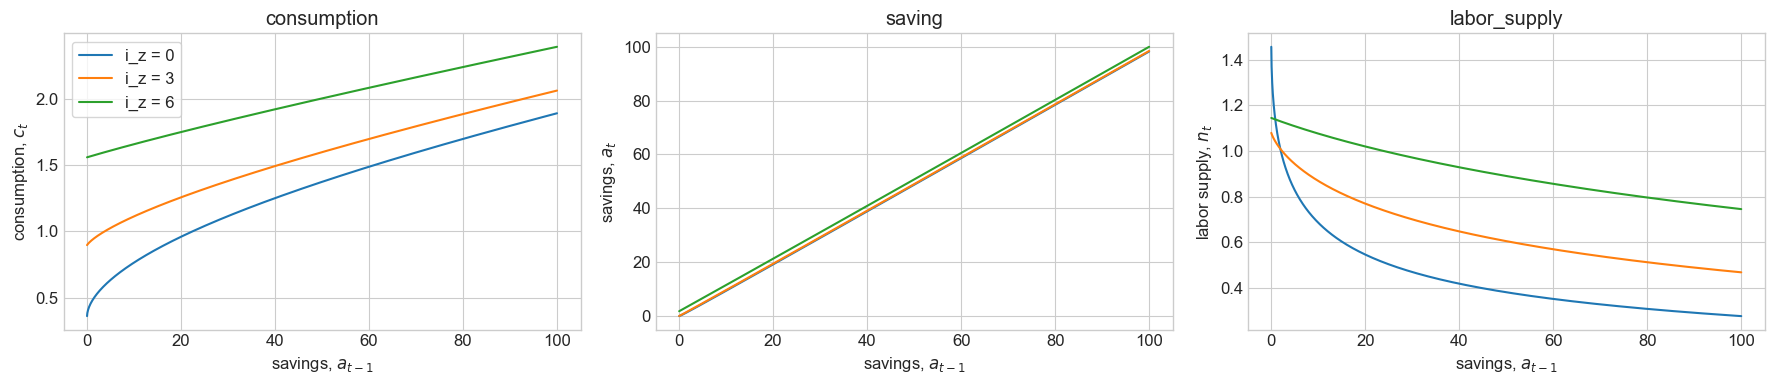

In [37]:
fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 500

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()

In [38]:
print("Steady state wage = ", ss.w)
print("Steady state B, G, A, A_HH, tau = ", ss.B, ss.G, ss.A, ss.A_hh, ss.tau)
print("Steady state interest rate", ss.r)
print("steady state consumption", ss.C_hh)
print("Steady state laborsupply ell ", ss.ell)
print("varphi= ", par.varphi, "beta = ", par.beta)

Steady state wage =  0.8480842695016758
Steady state B, G, A, A_HH, tau =  5.6 0.0 5.6 5.599999999999968 0.0
Steady state interest rate 0.0
steady state consumption 0.9996101134332942
Steady state laborsupply ell  [[[1.45697807 1.45052681 1.44402847 ... 0.28068807 0.2790241  0.27736578]
  [1.30747236 1.30320902 1.29890926 ... 0.33578472 0.33388483 0.33198987]
  [1.17252912 1.16971423 1.1668727  ... 0.39999732 0.39785608 0.39571843]
  ...
  [1.06893789 1.06887233 1.06880598 ... 0.55774762 0.55516751 0.55258593]
  [1.09671212 1.09667675 1.09664095 ... 0.65086152 0.64812519 0.64538369]
  [1.14525482 1.14523146 1.14520782 ... 0.75169    0.74886989 0.74604051]]]
varphi=  0.8 beta =  0.9871633687211516


## Simulation

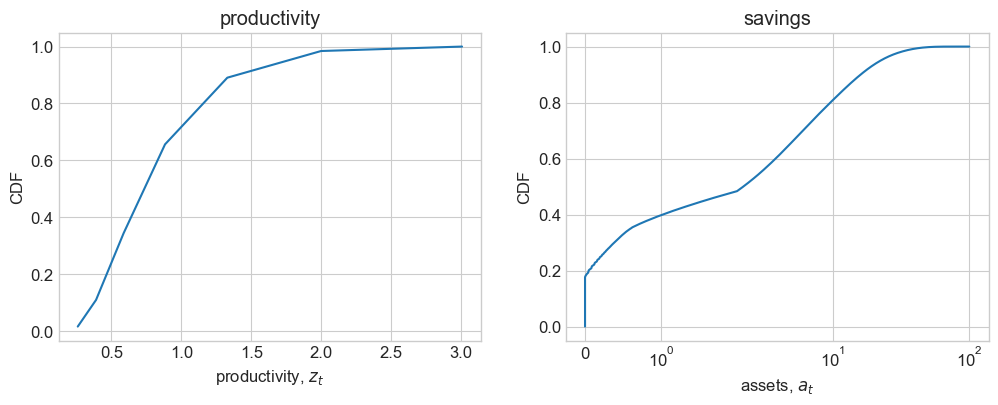

In [39]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D[0],axis=1))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D[0],axis=0)),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')


# Step 2: Compute Jacobians (incl. tests)

**Household transition path:**

In [ ]:
model.test_hh_path()

**Full transition path:**

In [ ]:
model.test_path()

In [ ]:
model.test_jacs(s_list=[50,100,150])

# Step 3a: Find non-linear transition path

## Find transition path

In [ ]:
par.jump_istar = -0.10/4
model.find_transition_path(do_print=True)

## Plot transitions

In [ ]:
paths = ['i','pi','r','C']
lvl_value = ['i','pi','r']
model.show_IRFs(paths,lvl_value=lvl_value,T_max=20,ncols=3)

In [ ]:
T_max = 50

fig = plt.figure(figsize=(16,4),dpi=100)

ax = fig.add_subplot(1,2,1)
i_color = 0
for use_inputs in [['Direct effects','r'],['Price effects','P'],['Income effects','N','w','d','tau'],None,'all']:
    
    # a. compute
    print(use_inputs)
    path_alt = model.decompose_hh_path(do_print=False,use_inputs=use_inputs)
    print('')
    
    # b. plot
    if use_inputs is None:
        label = 'no inputs'
        ls = '--'
        color = 'black'
    elif use_inputs == 'all':
        label = 'all inputs'
        ls = '-'
        color = 'black'
    else:
        label = f'{use_inputs[0]}'
        ls = '-'
        color = colors[i_color]
        i_color += 1
        
    ax.plot((path_alt.C_hh[0,:50]/ss.C_hh-1)*100,ls=ls,color=color,label=label);
ax.set_title('Necessities consumption')    
ax.set_ylabel('% diff to s.s.')
ax.legend(frameon=True);

ax = fig.add_subplot(1,2,2)
i_color = 0
for use_inputs in [['Direct effects','r'],['Price effects','P'],['Income effects','N','w','d','tau'],None,'all']:

    
    # a. compute
    print(use_inputs)
    path_alt = model.decompose_hh_path(do_print=False,use_inputs=use_inputs)
    print('')
    
    # b. plot
    if use_inputs is None:
        label = 'no inputs'
        ls = '--'
        color = 'black'
    elif use_inputs == 'all':
        label = 'all inputs'
        ls = '-'
        color = 'black'
    else:
        label = f'only effect from {use_inputs[0]}'
        ls = '-'
        color = colors[i_color]
        i_color += 1
        
    ax.plot((path_alt.ELL_hh[0,:50]/ss.ELL_hh-1)*100,ls=ls,color=color,label=label);
ax.set_title('Labor supply')        
ax.set_ylabel('% diff to s.s.')
#ax.legend(frameon=True);

# Step 3b: Find linearized IRFs

In [ ]:
model.find_IRFs(do_print=True)

In [ ]:
paths = ['C']
model.show_IRFs(paths,T_max=20,ncols=3,do_linear=True)

# Step 4. Simulation

In [ ]:
np.random.seed(1917)
model.simulate(do_print=True)

In [ ]:
def model_sim():
    
    fig = plt.figure(figsize=(12,8),dpi=100)

    ax = fig.add_subplot(2,2,1)
    ax.set_title('i')
    ax.plot(ss.i+sim.di,ls='--')
    ax.axhline(ss.i,color='black',zorder=0)

    ax = fig.add_subplot(2,2,2)
    ax.set_title('pi')
    ax.plot(ss.pi+sim.dpi,ls='--',)
    ax.axhline(ss.pi,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,3)
    ax.set_title('r')
    ax.plot(ss.r+sim.dr,ls='--',)
    ax.axhline(ss.r,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,4)
    ax.set_title('C')
    ax.plot(ss.C+sim.dC,ls='--',)
    ax.axhline(ss.C,color='black',zorder=0)
    

In [ ]:
model_sim()